## 1. Tweet classification: Trump vs. Trudeau
<p>Tweets pose specific problems to NLP, including the fact they are shorter texts. There are also plenty of platform-specific conventions to give you hassles: mentions, #hashtags, emoji, links and short-hand phrases ("ikr", "smh", "fyi").</p>

<p>To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (CountVectorizer and TfidfVectorizer). And we will also want to import some models, including MultinomialNB from the naive_bayes module, LinearSVC from the svm module and PassiveAggressiveClassifier from the linear_model module. Finally, we'll need sklearn.metrics and train_test_split and GridSearchCV from the model_selection module to evaluate and optimize our model.</p>

In [64]:
import random; random.seed(42)
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

print('setup complete')

setup complete


## 2. Transforming our collected data
<p>Since the data has been collected via the Twitter API and not split into test and training sets, we'll need to do this. Let's use train_test_split() with random_state=42 and a test size of 0.30. This will ensure we have enough test data and we'll get the same results no matter where or when we run this code.</p>

In [65]:
tweet_df = pd.read_csv('datasets/tweets.csv')

display(tweet_df)

y = tweet_df['author']

X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.30, random_state=42)

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


## 3. Vectorize the tweets
<p>We have the training and testing data all set up, but we need to create vectorized representations of the tweets in order to apply machine learning.</p>
<p>To do so, we will utilize the CountVectorizer and TfidfVectorizer classes which we will first need to fit to the data.</p>
<p>Once this is complete, we can start modeling with the new vectorized tweets!</p>

In [66]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## 4. Training a multinomial naive Bayes model
<p>Now that we have the data in vectorized form, we can train the first model. Investigate using the Multinomial Naive Bayes model with both the CountVectorizer and TfidfVectorizer data. Which do will perform better?</p>
<p>To assess the accuracies, we will print the test sets accuracy scores for both models.</p>

In [67]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred, y_test)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)

count_nb_score = metrics.accuracy_score(count_nb_pred, y_test)

print('Naive Bayes TF-IDF Score: ', tfidf_nb_score)
print('Naive Bayes Count Score: ', count_nb_score)

Naive Bayes TF-IDF Score:  0.575
Naive Bayes Count Score:  0.5833333333333334


## 5. Evaluating our model using a confusion matrix
<p>We see that the TF-IDF model performs better than the count-based approach. We know that TF-IDF allows unique tokens to have a greater weight - perhaps tweeters are using specific important words that identify them.</p>

<p>For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class. How many times was Trump misclassified as Trudeau?</p>

Confusion matrix, without normalization
Confusion matrix, without normalization


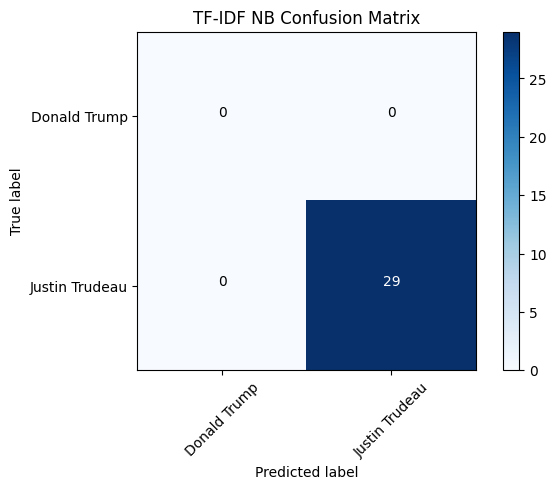

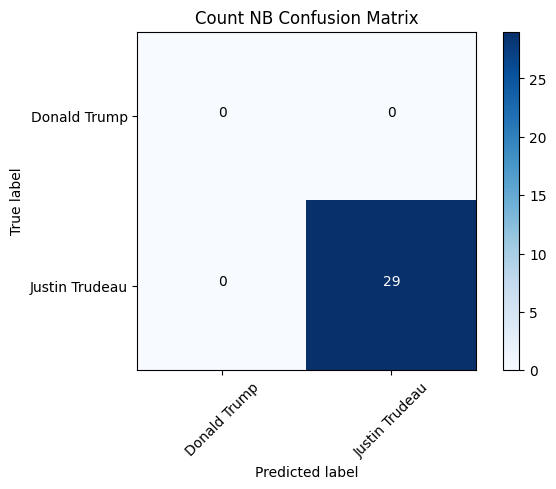

In [68]:
%matplotlib inline
from datasets.helper_functions import plot_confusion_matrix

tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['Donald Trump', 'Justin Trudeau'])

plot_confusion_matrix(tfidf_nb_cm, classes=['Donald Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

plot_confusion_matrix(count_nb_cm, classes=['Donald Trump', 'Justin Trudeau'], title="Count NB Confusion Matrix", figure=1)

## 6. Trying out another classifier: Linear SVC
<p>So the Bayesian model only has one prediction difference between the TF-IDF and count vectorizers! Interestingly, there is some confusion when the predicted label is Trump but the actual tweeter is Trudeau. If we were going to use this model, we would want to investigate what tokens are causing the confusion in order to improve the model.</p>

c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC Score:   0.800
Confusion matrix, without normalization


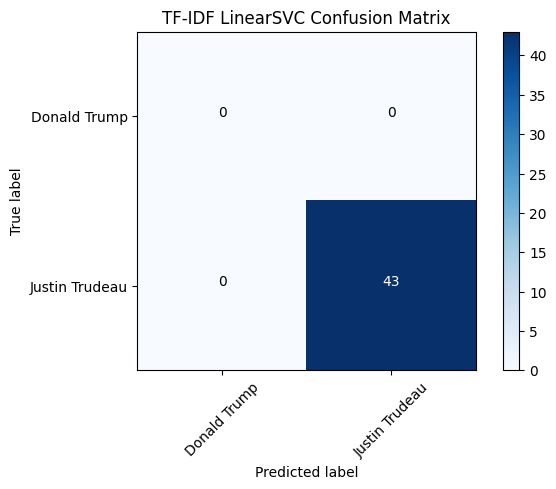

In [69]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['Donald Trump', 'Justin Trudeau'])
plot_confusion_matrix(svc_cm, classes=['Donald Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

In [70]:
print('Naive Bayes TF-IDF Score:', tfidf_nb_score)
print('Naive Bayes Count Score:', count_nb_score)
print("LinearSVC Score: %0.3f" % tfidf_svc_score)


Naive Bayes TF-IDF Score: 0.575
Naive Bayes Count Score: 0.5833333333333334
LinearSVC Score: 0.800


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tfidf_svc_pred))


                 precision    recall  f1-score   support

Donald J. Trump       0.78      0.85      0.82        62
 Justin Trudeau       0.83      0.74      0.78        58

       accuracy                           0.80       120
      macro avg       0.80      0.80      0.80       120
   weighted avg       0.80      0.80      0.80       120



In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tfidf_nb_pred))


                 precision    recall  f1-score   support

Donald J. Trump       0.58      0.65      0.61        62
 Justin Trudeau       0.57      0.50      0.53        58

       accuracy                           0.57       120
      macro avg       0.57      0.57      0.57       120
   weighted avg       0.57      0.57      0.57       120



In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, count_nb_pred))


                 precision    recall  f1-score   support

Donald J. Trump       0.59      0.66      0.62        62
 Justin Trudeau       0.58      0.50      0.54        58

       accuracy                           0.58       120
      macro avg       0.58      0.58      0.58       120
   weighted avg       0.58      0.58      0.58       120

